<a href="https://colab.research.google.com/github/Autumn60/Arduino-IRremote/blob/master/Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
469/469 [==============================] - 4s 9ms/step - loss: 2.4334 - accuracy: 0.1237 - val_loss: 2.3415 - val_accuracy: 0.1472
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 2.3158 - accuracy: 0.1531 - val_loss: 2.2527 - val_accuracy: 0.1803
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 2.2359 - accuracy: 0.1967 - val_loss: 2.1890 - val_accuracy: 0.2894
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 2.1768 - accuracy: 0.3258 - val_loss: 2.1384 - val_accuracy: 0.4266
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 2.1289 - accuracy: 0.4523 - val_loss: 2.0936 - val_accuracy: 0.5272
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 2.0855 - accuracy: 0.5391 - val_loss: 2.0517 - val_accuracy: 0.5927
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 2.0458 - accuracy: 0.5975 - val_loss: 2.0115 - val_accuracy: 0.6341
Epoch 

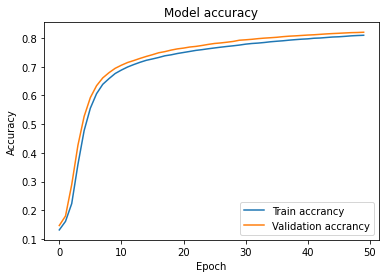

In [5]:
import keras
from keras.datasets import mnist                    # MNIST データセットを読み込む（Kerasに用意されている）
from keras.models import Sequential                 # Sequential model でネットワークを記述する
from keras.layers import Dense, Activation          # 層の種類(Dense：全結合層)
from keras import optimizers                        # 最適化手法 学習のときに使う
from keras import backend as K                      # バックエンドの汎用性を持たせるおまじない
import numpy as np                                  # NumPyを使う
import matplotlib.pyplot as plt                     # PyPlot を使う

batch_size = 128
num_classes = 10          # 出力クラス数
epochs = 50               # 学習回数

# the data, split between train(学習) and test(検証) sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#mimg=x_train[0]                   # x_train[0] の画像データ(0番目)
#mimg=mimg.reshape(28,28)          # 28x28にreshape
#plt.imshow(mimg, cmap='Greys')    # グレイスケールで画像を表示
#print(y_train[0])                 # y_train の0番目のラベルデータ（正解の数字）

x_train = x_train.reshape(60000, 784) # 2次元配列を1次元に変換 28*28=784 学習用の6万枚
x_test = x_test.reshape(10000, 784)   # 検証用の1万枚
x_train = x_train.astype('float32')   # int型をfloat32型（32bit実数型）に変換
x_test = x_test.astype('float32')
x_train /= 255                        # 明るさ[0-255]の値を[0.0-1.0]に変換
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)  #ラベルの数字をカテゴリリストに変換
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()                  # シーケンシャルモデルで作成する宣言
model.add(Dense(512))                 # 512個のユニットを作って前の層と全結合 (Dense)
model.add(Activation('sigmoid'))      # シグモイド関数
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,           # 学習開始、履歴をhistoryに保存
                     batch_size=batch_size,
                     verbose=1,
                     epochs=epochs,
                     validation_data=(x_test, y_test))
model.summary()                     #モデルの概要表示
# グラフ化のため、履歴からデータを取り出す
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accrancy', 'Validation accrancy'])
plt.show()